In [ ]:
#Project 2

In [38]:
!pip install ts2vg
!pip install igraph
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycairo-1.23.0.tar.gz (344 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import networkx as nx
import matplotlib.pyplot as plt
import os
import itertools
from google.colab import files
uploaded = files.upload()
# We make the files name into the format like acc_climbingdown_chest_s3.csv

In [40]:
df_append1 = pd.DataFrame()#create a dataframe and combine all of the datasets from rows 1000-2024 into one dataset
imported_files = list(uploaded.keys())
if len(imported_files)==0:# because the dataset we use the format for column subject could be different and we need to make all of them the same so we need this
  imported_files = [x for x in os.listdir('.') if x.endswith('csv')]
for file in sorted(imported_files):
  df_temp = pd.read_csv(file)
  df_temp = df_temp.iloc[1000:2024,:]#get 1000-2024 rows of each file
  df_temp['subject'] = f"{file.split('_')[3].replace('.csv','').replace('s','')}"#get the subject,activity,body_sensor that we need by using the file.split and make all values the same format
  df_temp['activity'] = file.split('_')[1]
  df_temp['body sensor'] = file.split('_')[2]
  df_append1 = df_append1.append(df_temp, ignore_index=True)
df_append1 = df_append1.drop(['id'],axis = 1)
df_append1

,attr_time,attr_x,attr_y,attr_z,subject,activity,body sensor
0,1435996988030,5.722142,4.464588,0.661997,1,climbingdown,chest
1,1435996988050,6.258443,6.097433,1.148618,1,climbingdown,chest
2,1435996988071,6.345831,7.076063,1.823185,1,climbingdown,chest
3,1435996988089,6.412870,7.289746,1.948880,1,climbingdown,chest
4,1435996988112,6.301539,6.783970,1.407192,1,climbingdown,chest
...,...,...,...,...,...,...,...
147451,1436620181934,-6.573879,3.261501,-2.173935,9,walking,head
147452,1436620181946,-6.971915,3.266888,-2.248754,9,walking,head
147453,1436620181960,-7.151481,3.661932,-2.386420,9,walking,head
147454,1436620181980,-7.521385,3.882198,-2.508525,9,walking,head


NATURAL VISIBILITY GRAPH
Two arbitrary data values  (𝑡𝑎,𝑦𝑎)  and  (𝑡𝑏,𝑦𝑏)  will have visibility, and consequently will become two connected nodes of the associated graph, if any other data  (𝑡𝑐,𝑦𝑐)  placed between them fulfills:
𝑦𝑐<(𝑦𝑏)+((𝑦𝑎−𝑦𝑏)(𝑡𝑏−𝑡𝑐/𝑡𝑏−𝑡𝑎)). 

HORIZONTAL VISIBILITY GRAPH
Visibility graphs have gained attention as a tool for the analysis of time series. Translating information about the time series to a graph makes it possible to use graph theory to provide insight on the series. It has been shown that this transformation retains several properties of the time series and the process that generated the time series can be characterized by properties of graph theory, such as the degree sequence of the corresponding grap time series:  𝑥𝑖,𝑥𝑗>𝑥𝑛  for all  𝑛  such that  𝑖<𝑛<𝑗

In [41]:
method=['NVG','HVG']#taking NVG and HVG an array named as method
Final_df = pd.DataFrame(columns= ['METHOD','SUBJECT','ACCELEROMETER AXIS','AVERAGE DEGREE','NETWORK DIAMETER','AVERAGE PATH LENGTH','BODY SENSOR','ACTIVITY'])
#defining the columns of the final dataframe as above 
body_sensor = ['chest','head']#taking body sensors chest and head into an array named as body_sensor
activity = ['climbingdown', 'climbingup', 'running', 'walking']#taking the activities into an array named as activity
attr = list(df_append1.iloc[:,1:4])#considering attr_x, attr_y and attr_z from the whole data into array attr
subject = [str(x) for x in range(1,16)]#considering subject number from this and storing in subject array
permutation_all =  list(itertools.product(attr, activity, body_sensor))#this will list out the values of attr,activity and bosy_sensor that are derived and stored in their respective arrays
for sub in subject:#for every subject value i.e, 1 to 15 the folloing executes
  for att, act,bs in permutation_all:# for every attribute, activity and body sensor of each subject the folloing executes
    temp_df = df_append1[(df_append1['subject']==sub)&(df_append1['activity']==act)&(df_append1['body sensor']==bs)][att]#storing all the values filtered into temporary dataframe
    nvg = NaturalVG() #calculating NVG values for each and stored
    hvg = HorizontalVG()#calculated HVG values for each and stored
    nvg.build(temp_df) #all these values are then matched with datafram values and added to that 
    nvg_values= nvg.as_igraph()# all the values of nvg are then are divide-and-conquer strategy is used in all cases
    hvg.build(temp_df)#similarly hvg is build
    hvg_values= hvg.as_igraph()# similarly as_igraph values are calculated
#appending all the calculated values of average degree, network diamenter, average path length in to the dataframe according to the graph method, subject and attributes
    Final_df.loc[len(Final_df.index)] = ['NVG', sub, att,np.mean(nvg_values.degree()), nvg_values.diameter(),nvg_values.average_path_length(),bs,act]
    Final_df.loc[len(Final_df.index)] = ['HVG', sub, att,np.mean(hvg_values.degree()), hvg_values.diameter(),hvg_values.average_path_length(),bs,act]


In [42]:
Final_df

,METHOD,SUBJECT,ACCELEROMETER AXIS,AVERAGE DEGREE,NETWORK DIAMETER,AVERAGE PATH LENGTH,BODY SENSOR,ACTIVITY
0,NVG,1,attr_x,15.609375,16,6.598815,chest,climbingdown
1,HVG,1,attr_x,3.951172,32,14.510884,chest,climbingdown
2,NVG,1,attr_x,10.019531,13,5.308571,head,climbingdown
3,HVG,1,attr_x,3.923828,38,13.302396,head,climbingdown
4,NVG,1,attr_x,15.376953,7,3.882824,chest,climbingup
...,...,...,...,...,...,...,...,...
715,HVG,15,attr_z,3.964844,21,10.148143,head,running
716,NVG,15,attr_z,9.318359,12,4.945985,chest,walking
717,HVG,15,attr_z,3.931641,30,10.897949,chest,walking
718,NVG,15,attr_z,13.353516,9,4.674661,head,walking


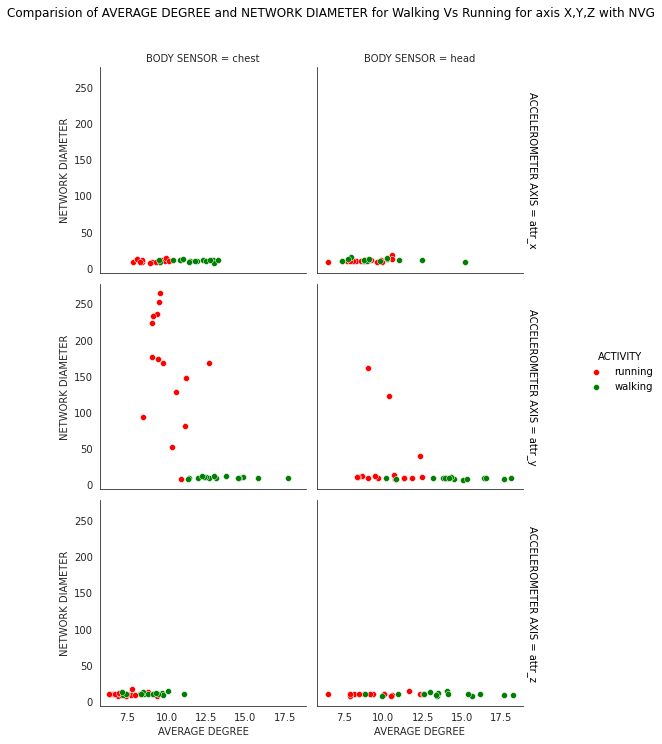

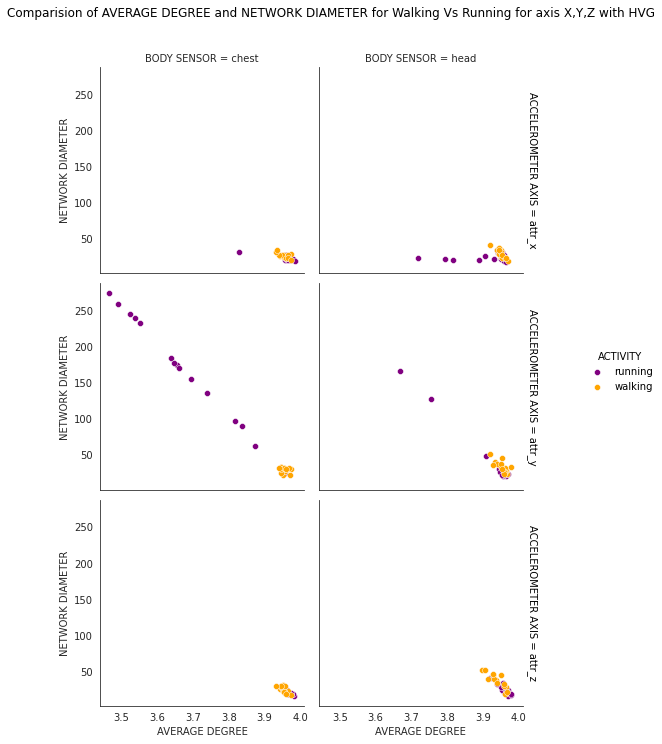

In [43]:
colour_dictionary1=dict({'running':'red',
                  'walking':'green'}) #defining the colors for scatter plots used for NVG
colour_dictionary2=dict({'running':'purple',
                  'walking':'orange'}) #defing the colors for scatter plots used for HVG
walking_running=Final_df[(Final_df['ACTIVITY']=='running') | (Final_df['ACTIVITY']=='walking')]
for graph in method:
  df_x=walking_running[walking_running['METHOD']==graph]
  if graph=='NVG':
    color=colour_dictionary1
  else:
    color=colour_dictionary2
  with sns.axes_style("white"):
    g = sns.FacetGrid(df_x, col="BODY SENSOR", row="ACCELEROMETER AXIS",hue='ACTIVITY',palette=color,margin_titles=True, height=3.5)
  g.map(sns.scatterplot, 'AVERAGE DEGREE', 'NETWORK DIAMETER')
  g.add_legend() 
  g.fig.subplots_adjust(top = 0.9) # adjusting the figures
  title='Comparision of AVERAGE DEGREE and NETWORK DIAMETER for Walking Vs Running for axis X,Y,Z with '+graph
  g.fig.suptitle(title)

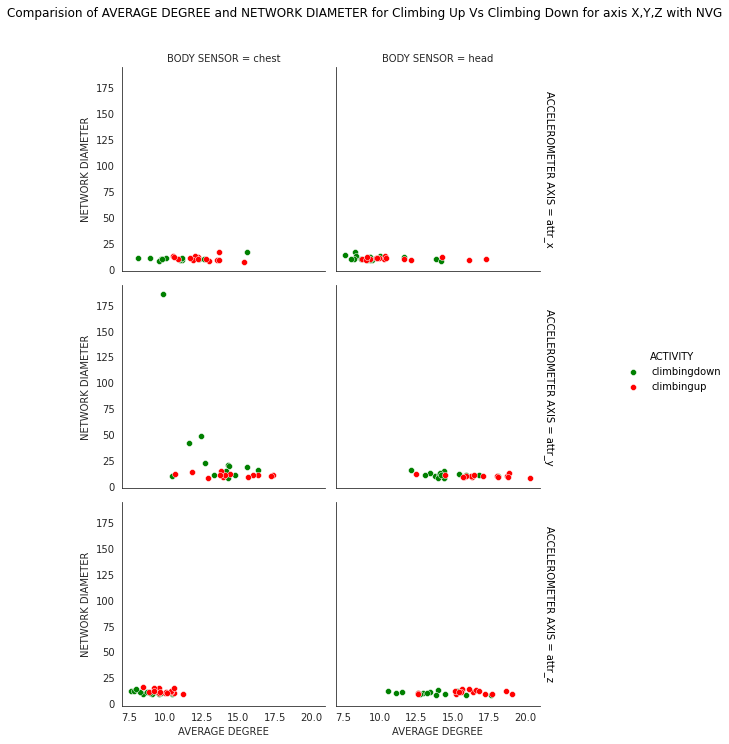

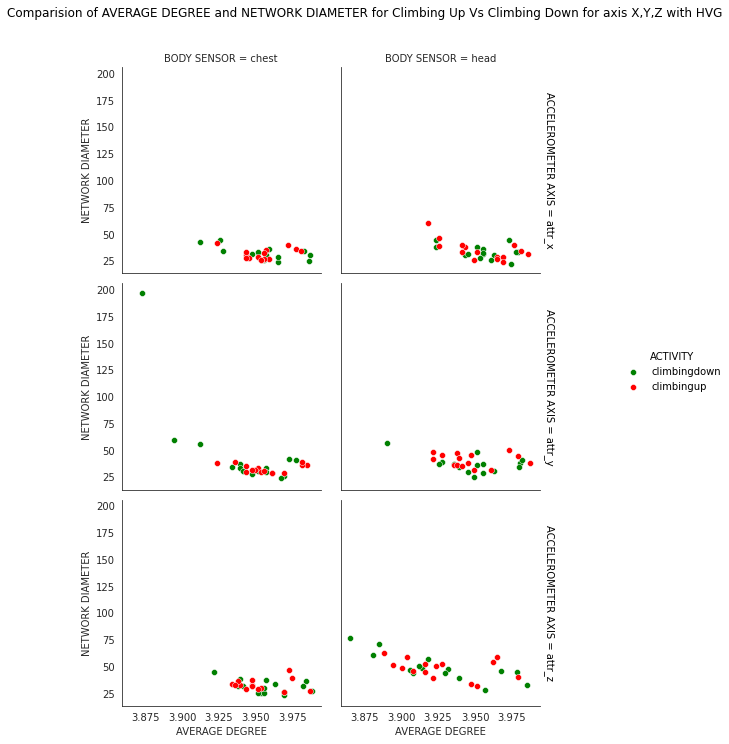

In [44]:
colour_dictionary1=dict({'climbingup':'red',
                  'climbingdown':'green'})
colour_dictionary2=dict({'climbingup':'purple',
                  'climbingdown':'orange'})
climbingup_down=Final_df[(Final_df['ACTIVITY']=='climbingup') | (Final_df['ACTIVITY']=='climbingdown')]
for graph in method:
  df_y=climbingup_down[climbingup_down['METHOD']==graph]
  if graph=='NVG':
    color=colour_dictionary1
  else:
    color=colour_dictionary1
  with sns.axes_style("white"):
    g = sns.FacetGrid(df_y, col="BODY SENSOR", row="ACCELEROMETER AXIS",hue='ACTIVITY',palette=color,margin_titles=True, height=3.5)
  g.map(sns.scatterplot, 'AVERAGE DEGREE', 'NETWORK DIAMETER')
  g.add_legend() 
  g.fig.subplots_adjust(top = 0.9) # adjusting the Figures
  title='Comparision of AVERAGE DEGREE and NETWORK DIAMETER for Climbing Up Vs Climbing Down for axis X,Y,Z with '+graph
  g.fig.suptitle(title)

In [45]:
#Perform the entropy function that professor upload in his github website
def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

In [46]:
df_append = pd.DataFrame()#create a dataframe and combine all of the datasets from rows 0-4096 into one dataset
imported_files = list(uploaded.keys())
if len(imported_files)==0:
  imported_files = [x for x in os.listdir('.') if x.endswith('csv')]
for file in sorted(imported_files):
  df_temp = pd.read_csv(file)
  df_temp = df_temp.iloc[0:4096,:]#get 0-4096 rows of each file
  df_temp['subject'] = f"{file.split('_')[3].replace('.csv','').replace('s','')}"#get the subject,activity,body_sensor that we need by using the file.split and make all values the same format
  df_temp['activity'] = file.split('_')[1]
  df_temp['body sensor'] = file.split('_')[2]
  df_append = df_append.append(df_temp, ignore_index=True)
df_append = df_append.drop(['id'],axis = 1)

In [47]:
final_data = pd.DataFrame(columns= ['subject', 'acc_meter_axis', 'signal_length', 'dimension', 'delay', 'permutation_entropy', 'complexity', 'activity', 'body_sensor'])
#creat a dataframe that includes all of the variables that we need in the final sheets
signal_length = [1024,2048,4096]#creat a list for signal_length in order to get every factor in this list in the next permutation step
embedded_dimension = [3, 4, 5, 6]#creat a list for embedded_dimension in order to get every factor in this list in the next permutation step
embedded_delay = [1, 2, 3]#creat a list for embedded_delay in order to get every factor in this list in the next permutation step
body_sensor = ['chest','head']#creat a list for body_sensor in order to get every factor in this list in the next permutation step
activity = ['climbingdown', 'climbingup', 'running', 'walking']#creat a list for activity in order to get every factor in this list in the next permutation step
attr = list(df_append.iloc[:,1:4])#creat a list for attributes in order to get every factor in this list in the next permutation step
subject = [str(x) for x in range(1,16)] #creat a list for subject in order to get every factor in this list in the next permutation step
permutation_all =  list(itertools.product(subject, attr, signal_length, activity, body_sensor))#creat a list that includes all of the possible permutation of subject attributes etc.
permutation_emb = list(itertools.product( embedded_dimension, embedded_delay,))#creat a list that includes all of the possible permutation of dimension and delay
for sub, att, sigl, act, bs in permutation_all: #creat for loop to loop through all of the permutation that includes subject,attributes etc
  temp = df_append[(df_append['subject'] == sub) & (df_append['activity'] == act)&(df_append['body sensor']==bs)][att].iloc[:sigl]# create a temp df that store all of the matched permutations
  for embdim, embdelay in permutation_emb:#create a for loop for computing the permutation_entopy for all permutation
    op = ordinal_patterns(temp, embdim, embdelay)
    comp=complexity(op)
    p_entr = p_entropy(op)
    #appending all the calculated values of permutation entropy, complexity and add them into a dataframe that includes subject, attributes, signal_length, dimension, delay, activity and body_sensor
    final_data.loc[len(final_data.index)] = [sub, att, sigl, embdim, embdelay, p_entr, comp, act,bs]


In [48]:
final_data

,subject,acc_meter_axis,signal_length,dimension,delay,permutation_entropy,complexity,activity,body_sensor
0,1,attr_x,1024,3,1,0.863880,0.113789,climbingdown,chest
1,1,attr_x,1024,3,2,0.960872,0.036053,climbingdown,chest
2,1,attr_x,1024,3,3,0.985169,0.014123,climbingdown,chest
3,1,attr_x,1024,4,1,0.807330,0.188031,climbingdown,chest
4,1,attr_x,1024,4,2,0.937040,0.073841,climbingdown,chest
...,...,...,...,...,...,...,...,...,...
12955,15,attr_z,4096,5,2,0.816146,0.233184,walking,head
12956,15,attr_z,4096,5,3,0.888227,0.164728,walking,head
12957,15,attr_z,4096,6,1,0.759268,0.275083,walking,head
12958,15,attr_z,4096,6,2,0.834517,0.251841,walking,head


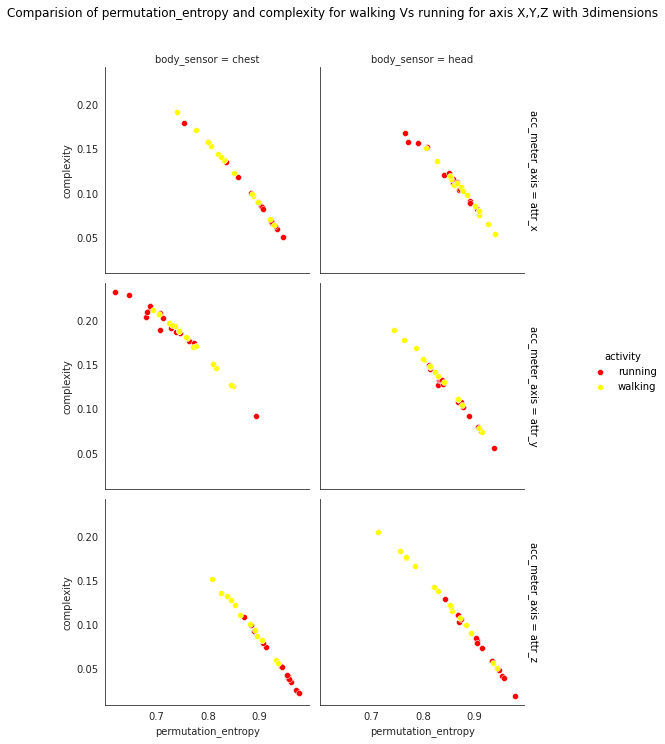

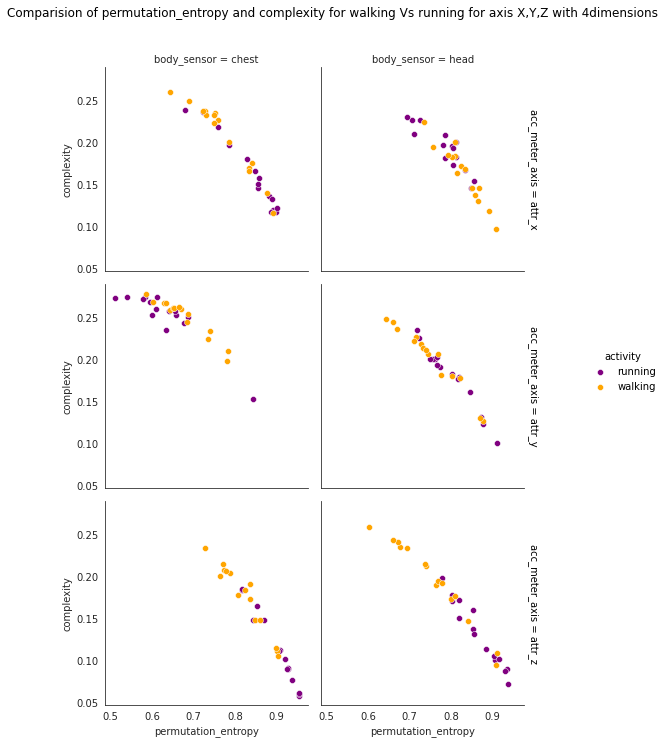

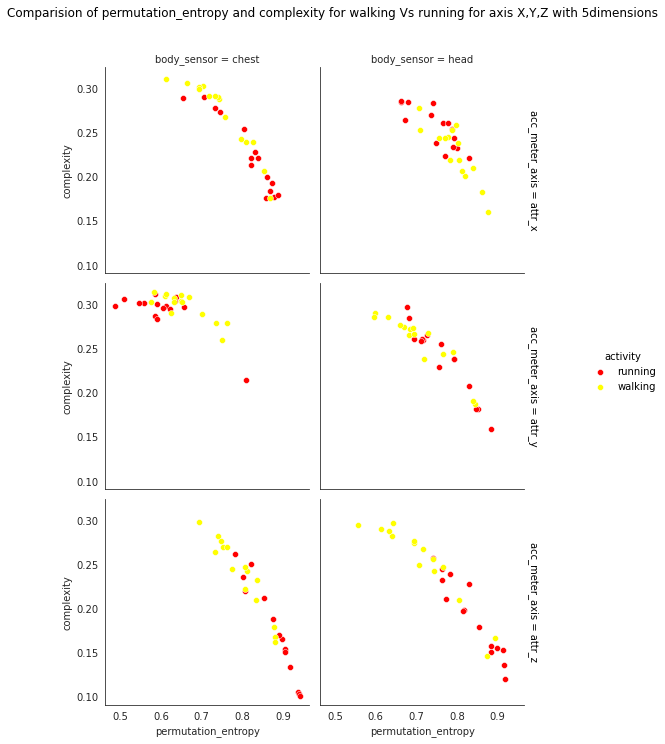

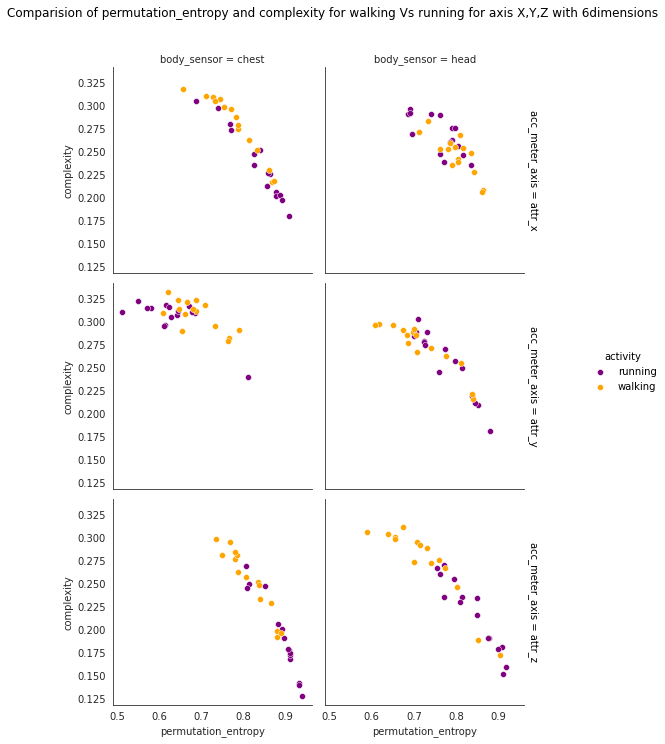

In [49]:
color_dict1=dict({'running':'red',
                  'walking':'yellow'})
color_dict2=dict({'running':'purple',
                  'walking':'orange'})
walk_run=final_data[(final_data['activity']=='running')&(final_data['signal_length']==4096) & (final_data['delay']==1)
                     | (final_data['activity']=='walking')&(final_data['signal_length']==4096) & (final_data['delay']==1)]
for graph in embedded_dimension:
  sub_df=walk_run[walk_run['dimension']==graph]
  if graph==3:
    color = color_dict1
  elif graph == 4:
    color = color_dict2
  elif graph ==5:
    color = color_dict1
  else:
    color = color_dict2
  with sns.axes_style("white"):
    g = sns.FacetGrid(sub_df, col="body_sensor", row="acc_meter_axis",hue='activity',palette=color,margin_titles=True, height=3.5)
  g.map(sns.scatterplot, 'permutation_entropy', 'complexity')
  g.add_legend() 
  g.fig.subplots_adjust(top = 0.9) # adjust the Figure
  title='Comparision of permutation_entropy and complexity for walking Vs running for axis X,Y,Z with '+str(graph)+'dimensions'
  g.fig.suptitle(title)

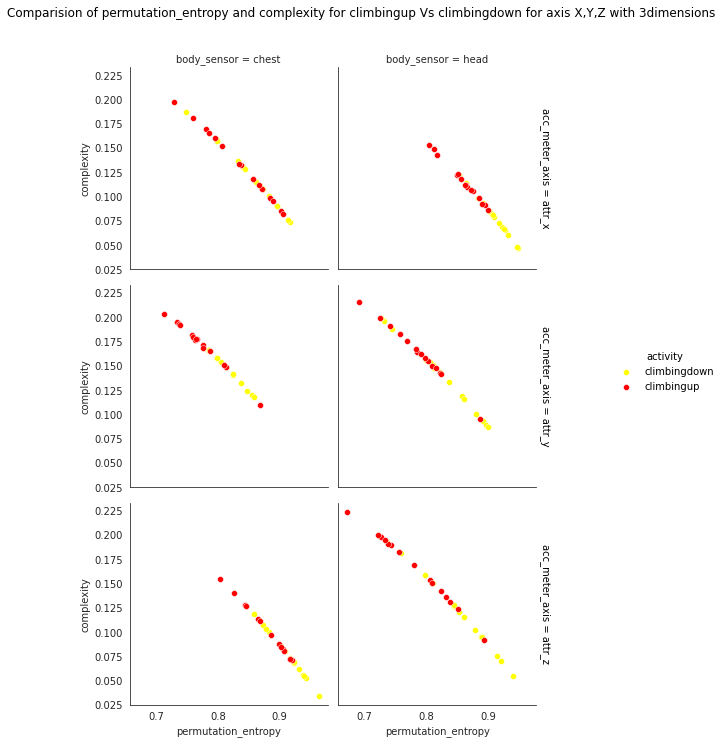

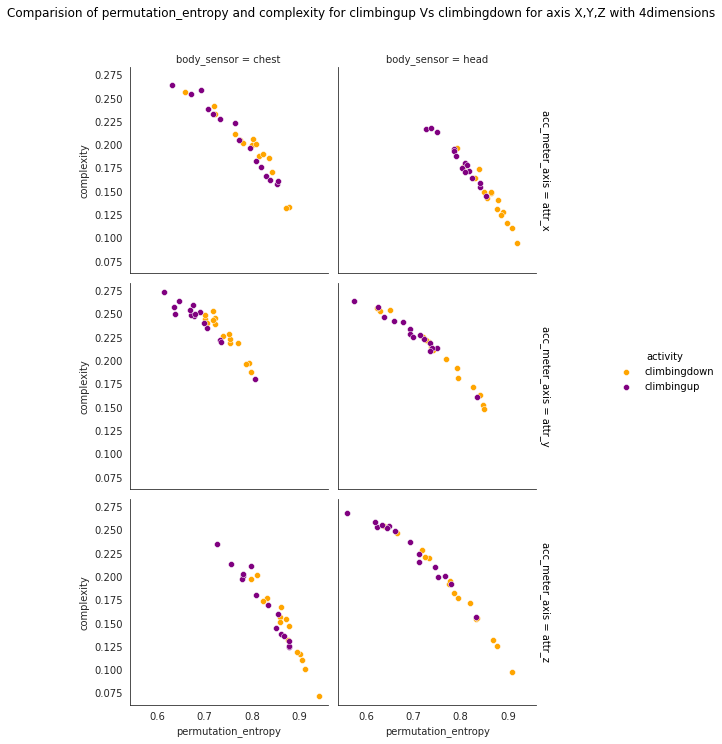

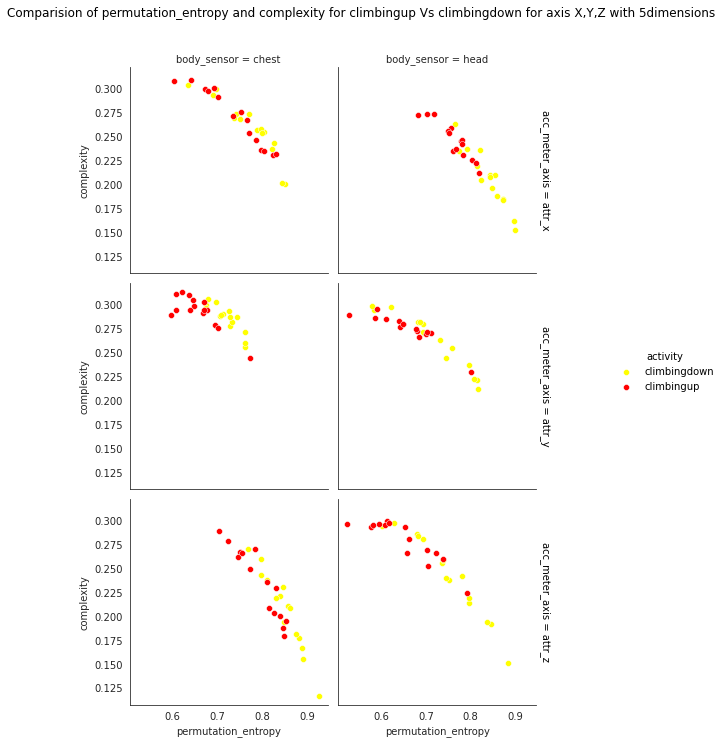

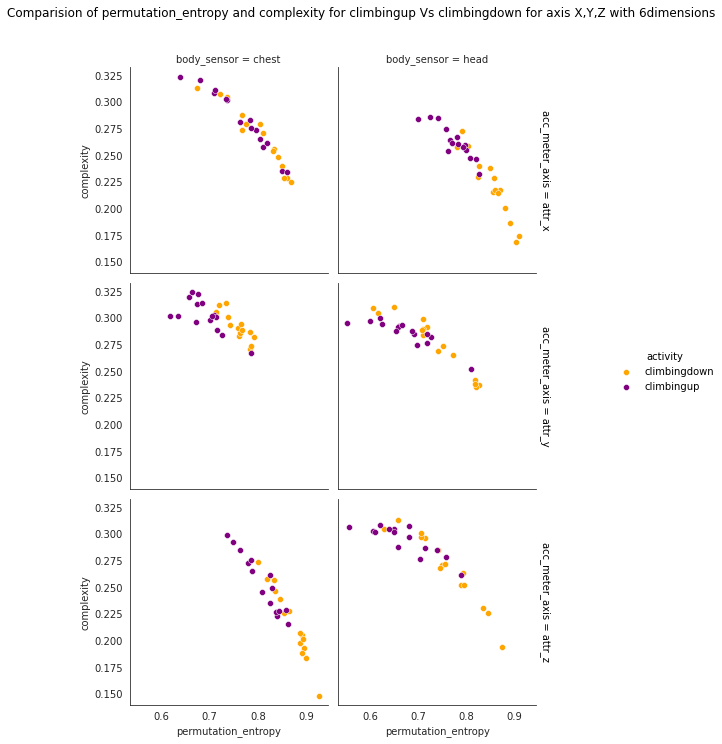

In [50]:
color_dict1=dict({'climbingup':'red',
                  'climbingdown':'yellow'})
color_dict2=dict({'climbingup':'purple',
                  'climbingdown':'orange'})
walk_run=final_data[(final_data['activity']=='climbingup')&(final_data['signal_length']==4096) & (final_data['delay']==1)
                     | (final_data['activity']=='climbingdown')&(final_data['signal_length']==4096) & (final_data['delay']==1)]
for graph in embedded_dimension:
  sub_df=walk_run[walk_run['dimension']==graph]
  if graph==3:
    color = color_dict1
  elif graph == 4:
    color = color_dict2
  elif graph ==5:
    color = color_dict1
  else:
    color = color_dict2
  with sns.axes_style("white"):
    g = sns.FacetGrid(sub_df, col="body_sensor", row="acc_meter_axis",hue='activity',palette=color,margin_titles=True, height=3.5)
  g.map(sns.scatterplot, 'permutation_entropy', 'complexity')
  g.add_legend() 
  g.fig.subplots_adjust(top = 0.9) # adjust the Figure
  title='Comparision of permutation_entropy and complexity for climbingup Vs climbingdown for axis X,Y,Z with '+str(graph)+'dimensions'
  g.fig.suptitle(title)

In [ ]:
!jupyter nbconvert --to html IE5374_Project2.ipynb